In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

In [26]:
print(keras.__version__)
print(tf.__version__)

2.2.0
1.8.0


In [27]:
from tensorflow.python.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [29]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

In [30]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_4")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [31]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total params: 361,150
Trainable params: 361,150
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [34]:
#Settting the learning rate
K.set_value(model.optimizer.lr, learning_rate)

In [35]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.4282 - acc: 0.8685 - val_loss: 0.1789 - val_acc: 0.9480
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1450 - acc: 0.9556 - val_loss: 0.1166 - val_acc: 0.9640
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0974 - acc: 0.9707 - val_loss: 0.1009 - val_acc: 0.9668
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0822 - val_acc: 0.9731
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0547 - acc: 0.9832 - val_loss: 0.0842 - val_acc: 0.9733
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0415 - acc: 0.9873 - val_loss: 0.0858 - val_acc: 0.9733
Epoch 7/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0315 - acc: 0.9900 - val_loss: 0.0774 - val_ac

In [36]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

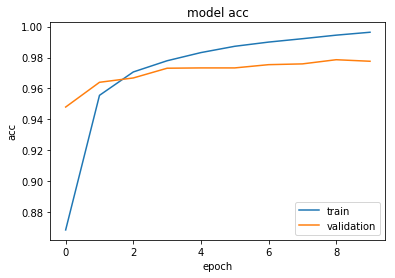

In [37]:
plot_train(history)

### Now lets add dropput

Dropout(0.3) = randomly dropout 30% of the units each pass through



In [38]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [39]:
model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total para

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/step - loss: 1.4026 - acc: 0.5575 - val_loss: 0.5365 - val_acc: 0.8568
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.6207 - acc: 0.8097 - val_loss: 0.3628 - val_acc: 0.8957
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.4742 - acc: 0.8563 - val_loss: 0.3020 - val_acc: 0.9127
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4094 - acc: 0.8766 - val_loss: 0.2666 - val_acc: 0.9210
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3627 - acc: 0.8917 - val_loss: 0.2403 - val_acc: 0.9291
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3308 - acc: 0.9027 - val_loss: 0.2195 - val_acc: 0.9342
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3062 - acc: 0.9082 - val_loss: 0.2035 - val_acc

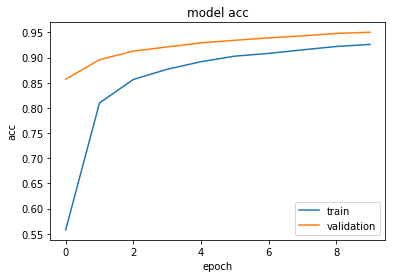

In [42]:
plot_train(history)

In [43]:
model.predict(x_test[0:4])

array([[3.10697033e-05, 1.95849429e-06, 9.09307040e-04, 3.84995452e-04,
        2.01997096e-07, 2.58797786e-06, 7.51847740e-09, 9.98402774e-01,
        6.44471811e-06, 2.60659726e-04],
       [1.40846430e-04, 3.40821891e-04, 9.94388521e-01, 3.15912184e-03,
        2.09010778e-07, 3.01564956e-04, 1.13039371e-03, 1.46199773e-06,
        5.36877604e-04, 8.72221904e-08],
       [1.25740735e-05, 9.95929539e-01, 8.73734883e-04, 2.93550198e-04,
        2.74721737e-04, 1.43057434e-04, 4.93569882e-04, 9.16657504e-04,
        9.71337955e-04, 9.12877804e-05],
       [9.99298453e-01, 3.97594619e-07, 2.19873415e-04, 1.16159172e-05,
        9.48574893e-07, 1.89747836e-04, 1.43730533e-04, 4.28594794e-05,
        1.37101488e-05, 7.87281024e-05]], dtype=float32)

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16773434303328394
Test accuracy: 0.9502
